# WEA FOR NEUTRON MONITOR AND COSMIC RAYS WORKSHOP

## Introduction

Cosmic Rays (CR)are energetic particles arriving isotropically to the Earth. They are produced and accelerated in astrophysical sources inside and outside the galaxy, their dyamics are governed by magnetic fields (**B**). Lower energy CR are modulated by the solar wind and its associated **B**.

These lower energy CR constitute a background of particles that provide a tool to monitor solar activity and space weather events. In order to detect and study such background, the Neutron Monitor (NM) worldwide network are installed around the world.

<img src="https://www.nmdb.eu/maps/nmdb_map.png" width="800" height="600">


The geomagnetic field also influences the lower energy CR and acts as a filter that constrains the regions that a CR can reach. This general property of **B**'s is called magnetic cut off rigidity.

<img src="https://www.researchgate.net/publication/363585158/figure/fig4/AS:11431281084637285@1663298557163/Cutoff-rigidity-map-for-the-year-2020-at-the-top-of-atmosphere-20-km-altitude.jpg" width="800" height="600">


As CR interact with the atmosphere, nuclei are broken and a shower of secondary CR is produced. This secondary flux decreases as a function of altitude; therefore, a NM placed at sea level would register a minimal flux of CR. 

<img src="https://media.sciencephoto.com/image/f0321481/800wm/F0321481-Cosmic_Ray_Shower.jpg" width="400" height="200">


## Hands on!

In [1]:
# To install required modules
# !pip install <module>
# import <module>

from useful_functions import *

import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.dates as md
from matplotlib import gridspec
import matplotlib.ticker as mtick

### Time

In [2]:
inicio = dt.datetime(2017, 9, 3, 0, 0, 0)
fin = dt.datetime(2017, 9, 14, 0, 0, 0)
c_rate = 60 # in minutes

tiempo = set_time(inicio, fin, c_rate)

Time starts on 2017-09-03 00:00:00 and ends on 2017-09-14 00:00:00


### Data processing

In [3]:
# Read Dst data

datos = pd.read_csv('Dst_index_GS_08_Sep_2017.dat', sep = '\s+', header = None)
dst = datos[3]
# dst

In [4]:
# Read NM's data
nm_data = pd.read_csv('NM_data.csv', sep = ';', header = 0)
nm_data = nm_data.drop(['DATETIME'], axis = 1)
nm_data['MXCO'] = nm_data['MXCO'].astype(float)

# Fill NaN with zeros:
for column in nm_data:
    nm_data[column].fillna(nm_data[column].mean(), limit = nm_data.shape[0], inplace = True)
# nm_data.info()

In [5]:
mxco = nm_data['MXCO']
jung = nm_data['JUNG']
newk = nm_data['NEWK']
oulu = nm_data['OULU']
sopo = nm_data['SOPO']

stations = [mxco, jung, newk, oulu, sopo]
nms = []

for station in stations:
    nm = counting_rate_modifier(station, 12, tiempo) # 12 values in 1 hr
    nm = counting_normalizer(nm)
    nms.append(nm)
nms = pd.concat(nms, axis = 1, ignore_index=True)

nms.columns = ['mxco', 'jung', 'newk', 'oulu', 'sopo']
nms

,mxco,jung,newk,oulu,sopo
2017-09-03 00:00:00,0.178489,-0.435221,0.265628,0.647197,1.432333
2017-09-03 01:00:00,0.245521,-0.225792,0.822410,0.538690,1.649191
2017-09-03 02:00:00,0.469719,0.054921,1.311643,0.661484,1.705329
2017-09-03 03:00:00,0.191939,-0.174098,1.300526,0.535060,1.772030
2017-09-03 04:00:00,0.131047,0.275052,1.634884,0.910317,1.662488
...,...,...,...,...,...
2017-09-13 19:00:00,0.276004,-0.074513,-0.001774,-0.174522,0.502785
2017-09-13 20:00:00,0.578126,-0.411209,0.330038,-0.579512,0.331529
2017-09-13 21:00:00,0.385690,-0.918774,-0.644353,-0.439264,0.613131
2017-09-13 22:00:00,0.038429,-0.777445,-0.004065,-0.967743,0.713504


### Plot data

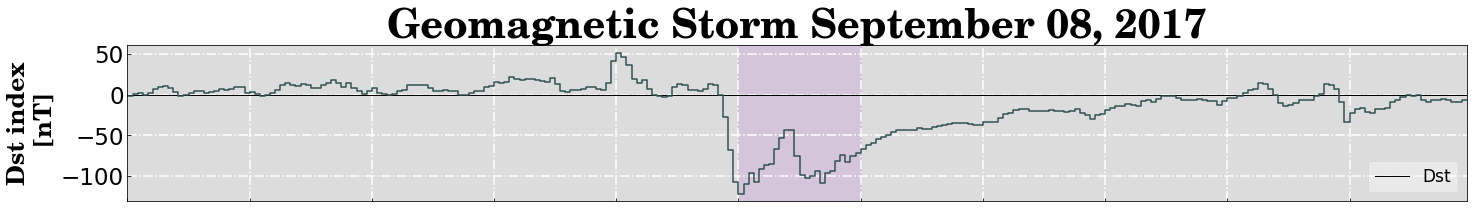

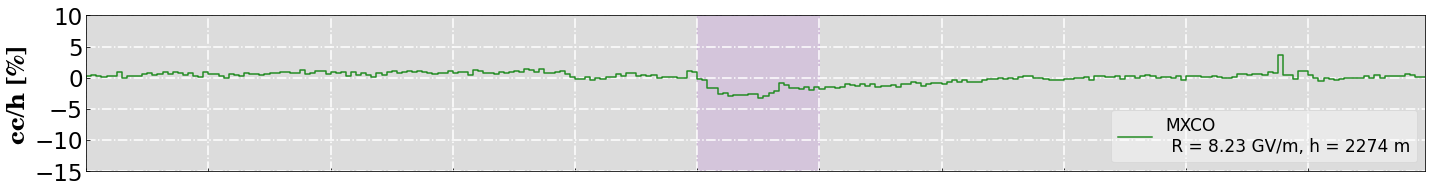

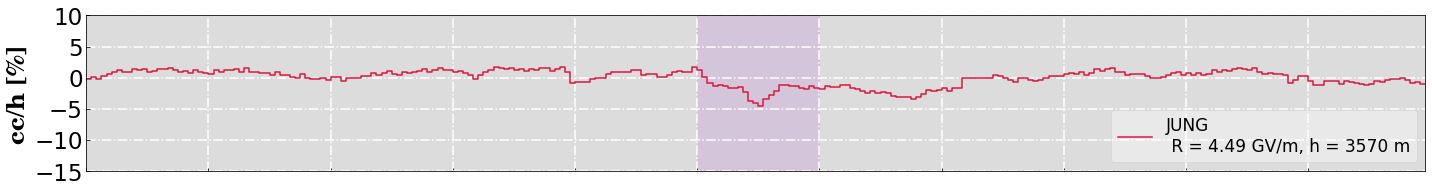

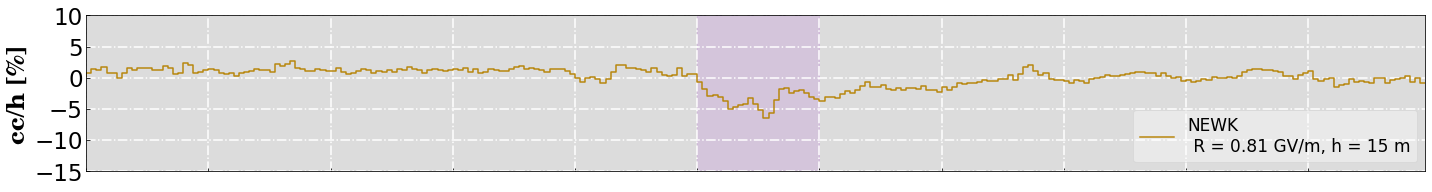

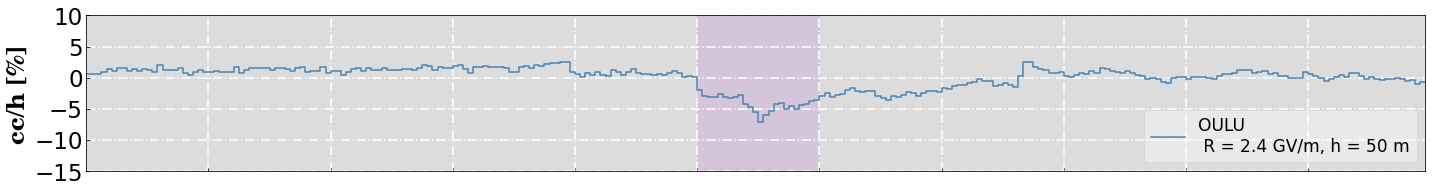

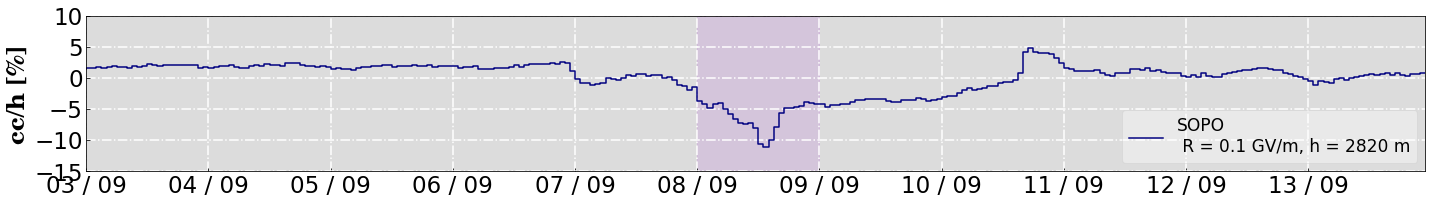

In [6]:
stations = [
            [dst, 'Dst', 'darkslategray', False, True],
            [nms.mxco, 'MXCO\n R = 8.23 GV/m, h = 2274 m', 'forestgreen', False, False],
            [nms.jung, 'JUNG\n R = 4.49 GV/m, h = 3570 m', 'crimson', False, False],
            [nms.newk, 'NEWK\n R = 0.81 GV/m, h = 15 m', 'darkgoldenrod', False, False], 
            [nms.oulu, 'OULU\n R = 2.4 GV/m, h = 50 m', 'steelblue', False, False], 
            [nms.sopo, 'SOPO\n R = 0.1 GV/m, h = 2820 m', 'navy', True, False]
            ]

for station, name, color, xlabels, title in stations:
    
    fig = plt.figure(figsize=(24,20))
    gs = gridspec.GridSpec(6, 1)  
    ax = plt.subplot(gs[len(range(0, 5))])
    ax.set_facecolor('gainsboro')
    
    if title == True:
        plt.title(label = "Geomagnetic Storm September 08, 2017", fontsize = 40, 
                  fontweight = 'bold', color = "k", fontname = 'C059')
        ax.axhline(y = 0, color='k', linestyle='-', lw = 1)
        plt.ylabel('Dst index\n [nT]', fontweight='bold',
           fontsize = 25, fontname = 'C059')
    else:
        plt.ylabel('cc/h [%]', fontweight='bold',
                   fontsize = 25, fontname = 'C059')
        
    ax.step(tiempo, station, color = color, ls = '-', lw = 1.5)
    plt.legend([name], loc='lower right', fontsize = 17, framealpha = 0.4)
    ax.axvspan(fin - timedelta(days = 6), fin - timedelta(days = 5),
            label="geomagnetic storm",color="darkviolet", alpha=0.1)
 
    plt.grid(True, lw = 1.5, color = 'w', ls = '-.', which = 'both')
    ax.tick_params(axis = 'both', which = 'both', direction = 'in', 
                    labelsize = 23, color = 'k')
    
    if title == False:
        ax.set_ylim(-15, 10)
        ax.yaxis.set_major_locator(mtick.MultipleLocator(5))
        ax.yaxis.set_major_locator(mtick.MultipleLocator(5))
    else:
        ax.yaxis.set_major_locator(mtick.MultipleLocator(50))
        
    ax.xaxis.set_major_formatter(md.DateFormatter('%d / %m')) # %m-%d\n%H:%M
    plt.setp(ax.get_xticklabels(), visible = xlabels)
    plt.subplots_adjust(hspace=0.2)
    plt.margins(x=0)

    
    
    plt.show()

In [7]:
# fig1 = plt.figure(figsize=(24,20))
# gs = gridspec.GridSpec(6, 1)  

# # Dst
# ax0 = plt.subplot(gs[0])
# ax0.set_facecolor('gainsboro')
# ax0.step(tiempo, dst, color='darkslategray', lw = 2)
# ax0.axvspan(fin - timedelta(days = 6), fin - timedelta(days = 5),
#             label="geomagnetic storm", color = "darkviolet", alpha = 0.1)
# ax0.axhline(y = 0, color='k', linestyle='-', lw = 1)
# plt.title(label="Geomagnetic Storm September 08, 2017", fontsize = 30, 
#           fontweight = 'bold', color = "k", fontname = 'C059')
# ax0.yaxis.set_major_locator(mtick.MultipleLocator(50))
# ax0.tick_params(axis = 'both', which = 'both', direction = 'in',labelsize = 23)
# plt.ylabel('Dst index [nT]', fontweight='bold',
#            fontsize = 25, fontname = 'C059')
# plt.grid(True, lw = 1.5, color = 'w', ls = '-.', which = 'both')
# plt.setp(ax0.get_xticklabels(), visible=False)

# # MXCO
# ax1 = plt.subplot(gs[1], sharex = ax0)
# ax1.set_facecolor('gainsboro')
# ax1.step(tiempo, nms.mxco, color = 'forestgreen', ls = '-', lw = 1.5)
# ax1.axvspan(fin - timedelta(days = 6), fin - timedelta(days = 5),
#             label="geomagnetic storm", color = "darkviolet", alpha = 0.1)
# plt.legend(['MXCO\n R = 8.23 GV/m, h = 2274 m'], loc='lower right', fontsize = 17, framealpha = 0.4) #  '\u00B1 3\u03C3'
# ax1.set_ylim(-15, 10)
# # ax0.set_xlim(0, 1100)
# plt.grid(True, lw = 1.5, color = 'w', ls = '-.', which = 'both')
# plt.ylabel('cc/h [%]', fontweight='bold',
#            fontsize = 25, fontname = 'C059') 
# # plt.xlabel('E$_{inj}$ [MeV]', fontweight='bold', 
# #            fontsize = 25, fontname = 'C059')
# # ax0.xaxis.set_major_locator(mtick.MultipleLocator(250))
# ax1.yaxis.set_major_locator(mtick.MultipleLocator(5))
# # ax1.yaxis.set_minor_locator(mtick.MultipleLocator(1))
# ax1.tick_params(axis = 'both', which = 'both', direction = 'in', 
#                 labelsize = 23, color = 'k')
# plt.setp(ax1.get_xticklabels(), visible=False)

# # JUNG
# ax2 = plt.subplot(gs[2], sharex = ax0)
# ax2.set_facecolor('gainsboro')
# ax2.step(tiempo, nms.jung, color = 'crimson', ls = '-', lw = 1.5)
# ax2.axvspan(fin - timedelta(days = 6), fin - timedelta(days = 5),
#             label="geomagnetic storm", color = "darkviolet", alpha = 0.1)
# plt.legend(['JUNG\n R = 4.49 GV/m, h = 3570 m'], loc='lower right', fontsize = 17, framealpha = 0.4)
# plt.ylabel('cc/h [%]', fontweight='bold',
#            fontsize = 25, fontname = 'C059') 
# plt.grid(True, lw = 1.5, color = 'w', ls = '-.', which = 'both')
# ax2.tick_params(axis = 'both', which = 'both', direction = 'in', 
#                 labelsize = 23, color = 'k')
# ax2.set_ylim(-15, 10)
# ax2.yaxis.set_major_locator(mtick.MultipleLocator(5))
# plt.setp(ax2.get_xticklabels(), visible=False)

# # OULU
# ax3 = plt.subplot(gs[4], sharex = ax0)
# ax3.set_facecolor('gainsboro')
# ax3.step(tiempo, nms.oulu, color = 'darkgoldenrod', ls = '-', lw = 1.5)
# ax3.axvspan(fin - timedelta(days = 6), fin - timedelta(days = 5),
#             label="geomagnetic storm",color="darkviolet", alpha=0.1)
# plt.legend(['OULU\n R = 2.4 GV/m, h = 50 m'], loc='lower right', fontsize = 17, framealpha = 0.4)
# plt.ylabel('cc/h [%]', fontweight='bold',
#            fontsize = 25, fontname = 'C059') 
# plt.grid(True, lw = 1.5, color = 'w', ls = '-.', which = 'both')
# ax3.tick_params(axis = 'both', which = 'both', direction = 'in', 
#                 labelsize = 23, color = 'k')
# ax3.set_ylim(-15, 10)
# ax3.yaxis.set_major_locator(mtick.MultipleLocator(5))
# plt.setp(ax3.get_xticklabels(), visible=False)

# # NEWK
# ax4 = plt.subplot(gs[3], sharex = ax0)
# ax4.set_facecolor('gainsboro')
# ax4.step(tiempo, nms.newk, color = 'steelblue', ls = '-', lw = 1.5)
# ax4.axvspan(fin - timedelta(days = 6), fin - timedelta(days = 5),
#             label="geomagnetic storm", color = "darkviolet", alpha = 0.1)
# plt.legend(['NEWK\n R = 0.81 GV/m, h = 15 m'], loc='lower right', fontsize = 17, framealpha = 0.4)
# plt.ylabel('cc/h [%]', fontweight='bold',
#            fontsize = 25, fontname = 'C059') 
# plt.grid(True, lw = 1.5, color = 'w', ls = '-.', which = 'both')
# ax4.tick_params(axis = 'both', which = 'both', direction = 'in', 
#                 labelsize = 23, color = 'k')
# ax4.set_ylim(-15, 10)
# ax4.yaxis.set_major_locator(mtick.MultipleLocator(5))
# plt.setp(ax4.get_xticklabels(), visible=False)

# # SOPO
# ax5 = plt.subplot(gs[5], sharex = ax0)
# ax5.set_facecolor('gainsboro')
# ax5.step(tiempo, nms.sopo, color = 'navy', ls = '-', lw = 1.5)
# ax5.axvspan(fin - timedelta(days = 6), fin - timedelta(days = 5),
#             label="geomagnetic storm",color="darkviolet", alpha=0.1)
# plt.legend(['SOPO\n R = 0.1 GV/m, h = 2820 m'], loc='lower right', fontsize = 17, framealpha = 0.4)
# plt.ylabel('cc/h [%]', fontweight='bold',
#            fontsize = 25, fontname = 'C059') 
# plt.grid(True, lw = 1.5, color = 'w', ls = '-.', which = 'both')
# ax5.tick_params(axis = 'both', which = 'both', direction = 'in', 
#                 labelsize = 23, color = 'k')
# ax5.set_ylim(-15, 10)
# ax5.yaxis.set_major_locator(mtick.MultipleLocator(5))
# ax5.xaxis.set_major_formatter(md.DateFormatter('%d / %m')) # %m-%d\n%H:%M
# plt.setp(ax5.get_xticklabels(), visible=True)

# plt.subplots_adjust(hspace=0.2)
# plt.margins(x=0)

# plt.savefig(f'Eff_SciCRT_vs_SNT.png', dpi = 'figure', bbox_inches= 'tight')
#     Special thx to : https://stackoverflow.com/questions/39870642/how-to-plot-a-high-resolution-graph
# plt.savefig(f'Eff_SciCRT_vs_SNT.pdf')
# !pdftoppm -png -r 300 Eff_SciCRT_vs_SNT.pdf Eff_SciCRT_vs_SNT

# plt.show()